In [100]:
import os
import numpy as np
from astropy.timeseries import LombScargle
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [101]:
#Estamos sacando los nombres de todos los archivos csv que estan dentro de la carpeta
ruta=r'C:\Users\sebas\OneDrive\Escritorio\_Noveno_semestre\proyecto_teorico\datos\DATOS_FINALES_PROYECTO_2'
contenido=os.listdir(r'C:\Users\sebas\OneDrive\Escritorio\_Noveno_semestre\proyecto_teorico\datos\DATOS_FINALES_PROYECTO_2')

lista_contenidos=[]

for j in range(1,len(contenido)):
    
    lista_contenidos.append(contenido[j])
lista_contenidos


['CVSO 253_s_32.csv',
 'CVSO 253_s_6.csv',
 'CVSO 254_s_32.csv',
 'CVSO 254_s_6.csv',
 'CVSO 258_s_32.csv',
 'CVSO 258_s_6.csv',
 'CVSO 267_s_32.csv',
 'CVSO 267_s_5.csv',
 'CVSO 268_s_32.csv',
 'CVSO 268_s_5.csv']

In [102]:
#En este codigo estamos creando dos diccionarios con el Id de cada estrella.
#En uno de los dicccionarios estamos colocando la informacion con respecto del tiempo de cada cadencia
#En el otro diccionario estamos colocando la informacion referente a la magnitud de cada cadencia 
diccionario_temporal={}
diccionario_magnitud={}
reader_10=0
reader_30=0
lista_10=[]
lista_30=[]

lista_ID=[]

lista_mag10=[]
lista_mag30=[]
for i in range(0,len(lista_contenidos),2):
    
    if contenido[i][:5]=="CVSO ":
        
        reader_10=pd.read_csv(ruta +"//" + lista_contenidos[i])
        reader_30=pd.read_csv(ruta +"//" + lista_contenidos[i+1])

        
        lista_10=reader_10["time"]
        lista_30=reader_30["time"]
        
        lista_mag10=reader_10["mag"]
        lista_mag30=reader_30["mag"]
        
     
        if len(contenido[i])==15:

            diccionario_temporal[ruta +"//" + lista_contenidos[i][:8]]=lista_10,lista_30
            diccionario_magnitud[ruta +"//" + lista_contenidos[i][:8]]=lista_mag10,lista_mag30
            lista_ID.append(ruta +"//" + lista_contenidos[i][:8])
        
        
        if len(contenido[i])==16:

            diccionario_temporal[ruta +"//" + lista_contenidos[i][:9]]=lista_10,lista_30
            diccionario_magnitud[ruta +"//" + lista_contenidos[i][:9]]=lista_mag10,lista_mag30
            lista_ID.append(ruta +"//" + lista_contenidos[i][:9])
            
        if len(contenido[i])==17:
       
            diccionario_temporal[ruta +"//" + lista_contenidos[i][:10]]=lista_10,lista_30
            diccionario_magnitud[ruta +"//" + lista_contenidos[i][:10]]=lista_mag10,lista_mag30
            lista_ID.append(ruta +"//" + lista_contenidos[i][:10])

# NOTA: LA PRIMERA CADENCIA QUE AGREGAMOS A LOS DICCIONARIOS ES LA DE 10 MIN

diccionario_temporal


{'C:\\Users\\sebas\\OneDrive\\Escritorio\\_Noveno_semestre\\proyecto_teorico\\datos\\DATOS_FINALES_PROYECTO_2//CVSO 254_': (0       2174.244740
  1       2174.251685
  2       2174.258629
  3       2174.265574
  4       2174.272519
             ...     
  3281    2199.807467
  3282    2199.814411
  3283    2199.821355
  3284    2199.828300
  3285    2199.835244
  Name: time, Length: 3286, dtype: float64,
  0      1468.287004
  1      1468.307837
  2      1468.328671
  3      1468.349504
  4      1468.370338
            ...     
  906    1489.953351
  907    1489.974184
  908    1489.995017
  909    1490.015849
  910    1490.036682
  Name: time, Length: 911, dtype: float64),
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\_Noveno_semestre\\proyecto_teorico\\datos\\DATOS_FINALES_PROYECTO_2//CVSO 258_': (0       2174.244740
  1       2174.251685
  2       2174.258629
  3       2174.265574
  4       2174.272519
             ...     
  3281    2199.814411
  3282    2199.821355
  3283    2199.8283

In [103]:
#Ahora ejecutaremos el codigo para Lomb-Scargle 
#Lo que haremos será generar un diccionario para cada estrella donde la llave sea el Id de la estrella
# y la clave sean los arrays de periodo y poder respectivamente


diccionario_periodo={}
diccionario_poder={}



for i in range(len(lista_ID)):
    freq=np.linspace((1/12.5),(1/0.5),5000)
    
    power_10=LombScargle(diccionario_temporal[lista_ID[i]][0],diccionario_magnitud[lista_ID[i]][0]).power(freq)
    power_30=LombScargle(diccionario_temporal[lista_ID[i]][1],diccionario_magnitud[lista_ID[i]][1]).power(freq)


    
    diccionario_poder[lista_ID[i]]=power_10,power_30
    diccionario_periodo[lista_ID[i]]=1/freq,1/freq

        


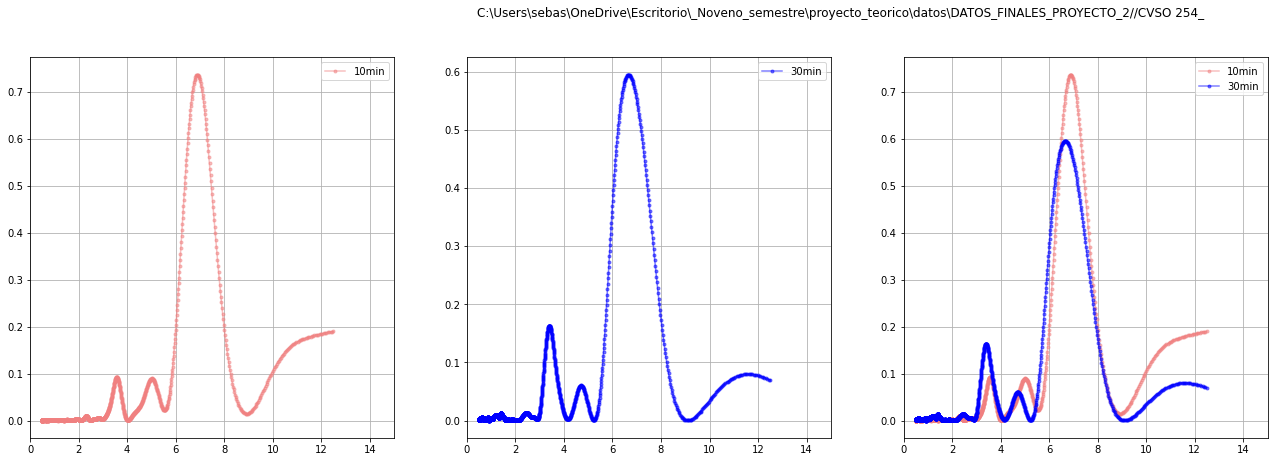

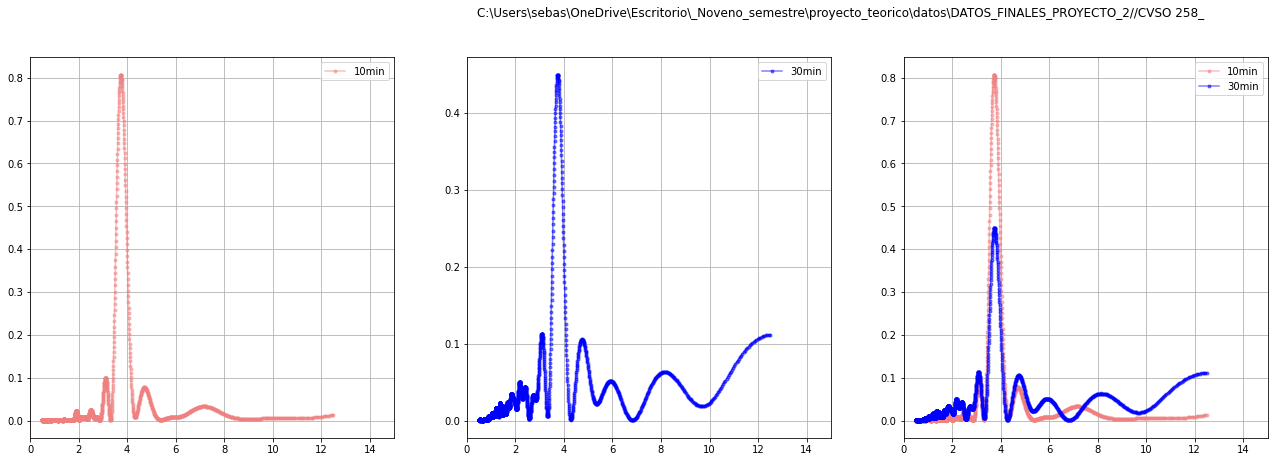

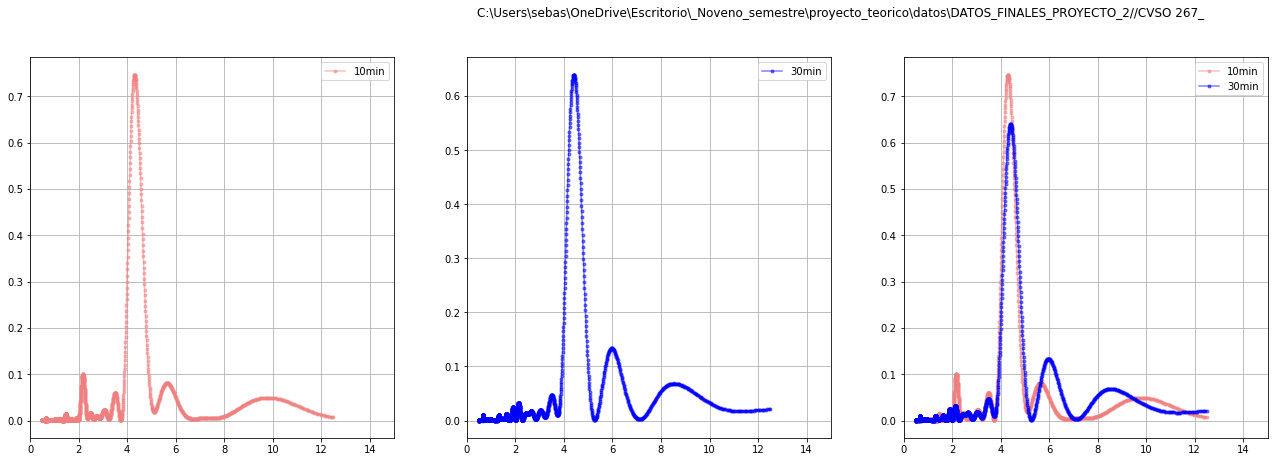

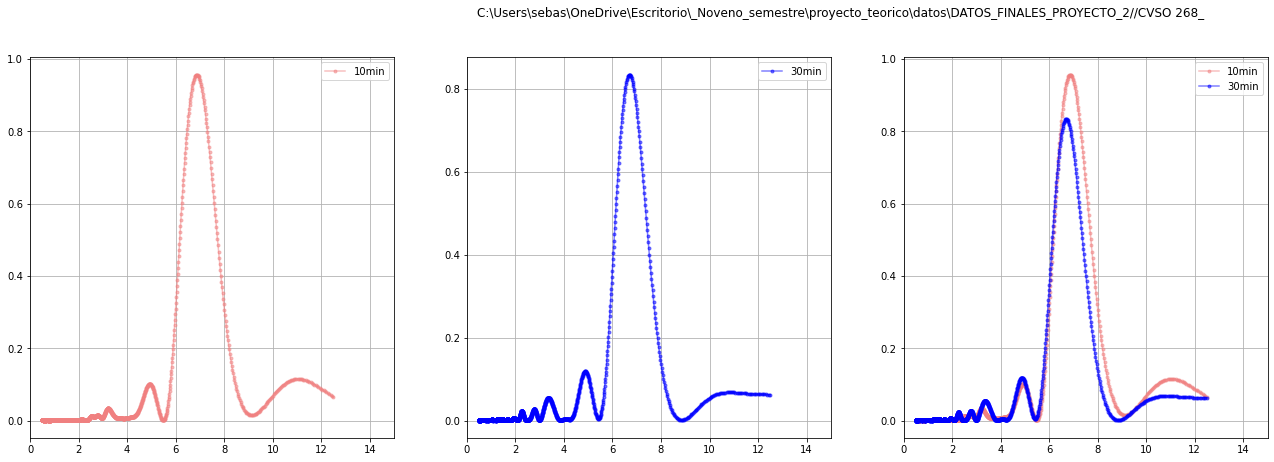

In [104]:
#Ahora generamos en codigo para generar todas las imagenes de todas las trellas
for j in range(len(lista_ID)):
    
        
    fig=plt.figure(figsize=(30,7))
    fig.suptitle(lista_ID[j])
    plt.tight_layout()
    
    for i in range(3):
        
        ax=plt.subplot(1,4,i+1)
        if i==0:
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000],marker=".",label="10min",alpha=0.5,color='lightcoral')
            ax.set_xlim(0,15)
            ax.grid()
            ax.legend()
        if i==1:
            ax.plot(diccionario_periodo[lista_ID[j]][1][:5000],diccionario_poder[lista_ID[j]][1][:5000],marker=".",label="30min",color='blue',alpha=0.5)
            ax.set_xlim(0,15)
            ax.grid()
            ax.legend()
        if i==2:
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000],marker=".",label="10min",alpha=0.5,color='lightcoral')
            ax.plot(diccionario_periodo[lista_ID[j]][1][:5000],diccionario_poder[lista_ID[j]][1][:5000],marker=".",label="30min",color='blue',alpha=0.5)
            ax.set_xlim(0,15)
            
            ax.grid()
            ax.legend()
            
        

In [105]:
#Ahora necesitamos de hacer un zoom en los picos de periodo para ver si cambian
#para ello buscaremos los periodos que mas imfluyen en los peridogramas para ambas cadencias en cada ID

diccionario_periodos_maximos={}
diccionario_indices_maximos={}

indice_periodo10=0
indice_periodo30=0

poder_max10=0
poder_max30=0
for i in range(len(lista_ID)):
    
    poder_max10=np.max(diccionario_poder[lista_ID[i]][0][:5000])
    poder_max30=np.max(diccionario_poder[lista_ID[i]][1][:5000])
    
    indice_periodo10=np.where(diccionario_poder[lista_ID[i]][0][:5000]==poder_max10)
    indice_periodo30=np.where(diccionario_poder[lista_ID[i]][1][:5000]==poder_max30)
    
    periodo_maximo10=diccionario_periodo[lista_ID[i]][0][indice_periodo10]
    periodo_maximo30=diccionario_periodo[lista_ID[i]][1][indice_periodo30]
    
    diccionario_periodos_maximos[lista_ID[i]]=[periodo_maximo10,periodo_maximo30]
    diccionario_indices_maximos[lista_ID[i]]=indice_periodo10,indice_periodo30
    
    


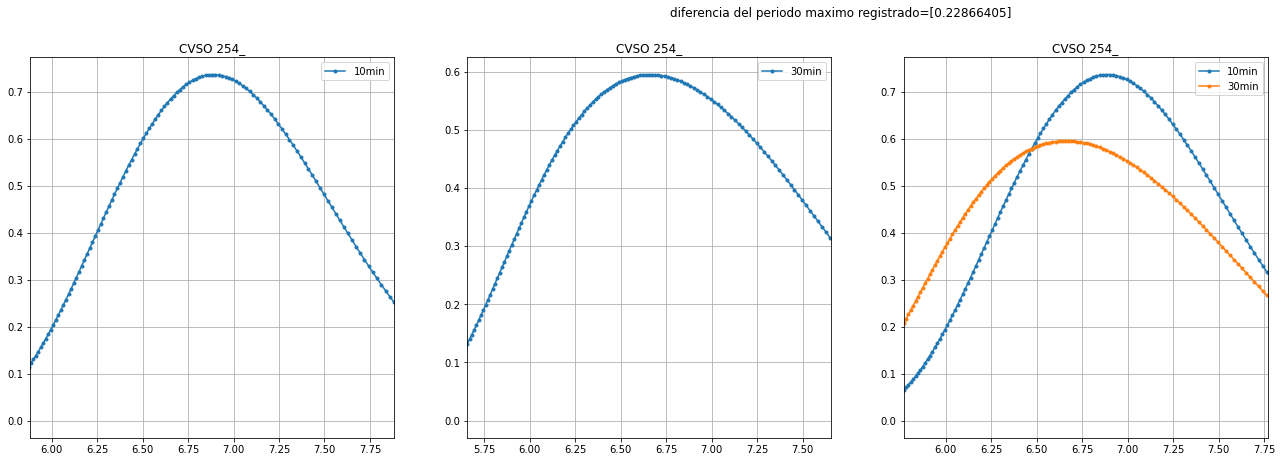

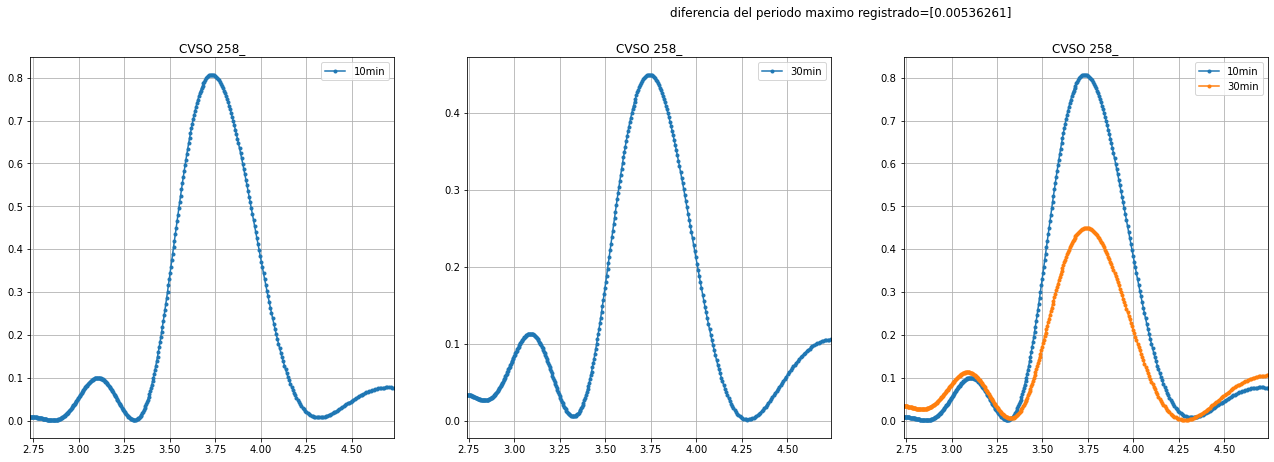

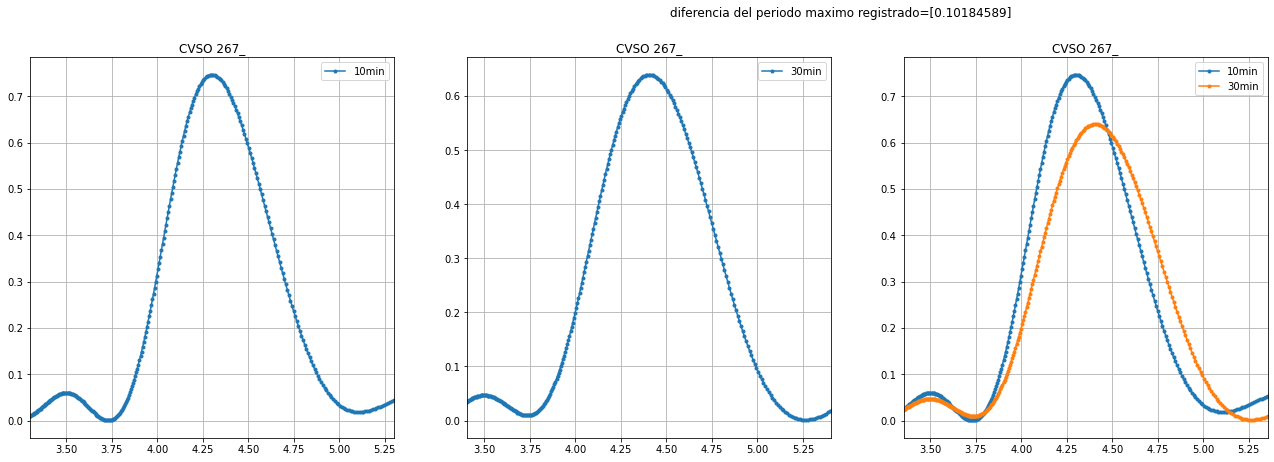

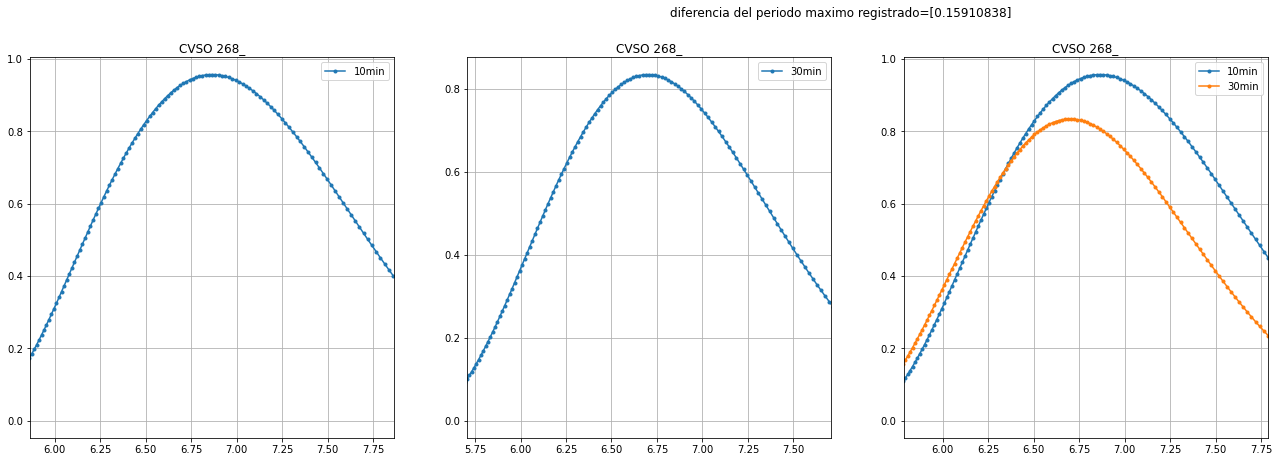

In [106]:
for j in range(len(lista_ID)):
    
        
    fig=plt.figure(figsize=(30,7))
    for k in range(len(lista_ID[j][:])):
        diferencia_=0
        
        if lista_ID[j][k]=="C" and lista_ID[j][k+1]=="V":
            
            diferencia_=np.abs(diccionario_periodos_maximos[lista_ID[j]][0]-diccionario_periodos_maximos[lista_ID[j]][1])
            fig.suptitle("diferencia del periodo maximo registrado=" +str(diferencia_))
            plt.tight_layout()

            
    
    xlim_10=diccionario_periodos_maximos[lista_ID[j]][0]
    xlim_30=diccionario_periodos_maximos[lista_ID[j]][1]
    
    for i in range(3):
        
        ax=plt.subplot(1,4,i+1)
        if i==0:
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000],marker=".",label="10min")
            ax.set_xlim(xlim_10-1,xlim_10+1)
            ax.grid()
            ax.legend()
            
        for k in range(len(lista_ID[j][:])):
            
            if lista_ID[j][k]=="C" and lista_ID[j][k+1]=="V":
                
                plt.title(lista_ID[j][k:])
                
                
        if i==1:
            ax.plot(diccionario_periodo[lista_ID[j]][1][:5000],diccionario_poder[lista_ID[j]][1][:5000],marker=".",label="30min")
            ax.set_xlim(xlim_30-1,xlim_30+1)
            ax.grid()
            ax.legend()
            
 
                
                
        if i==2:
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000],marker=".",label="10min")
            ax.plot(diccionario_periodo[lista_ID[j]][1][:5000],diccionario_poder[lista_ID[j]][1][:5000],marker=".",label="30min")
            ax.set_xlim(((xlim_10+xlim_30)/2)-1,((xlim_10+xlim_30)/2)+1)
            
            ax.grid()
            ax.legend()
            

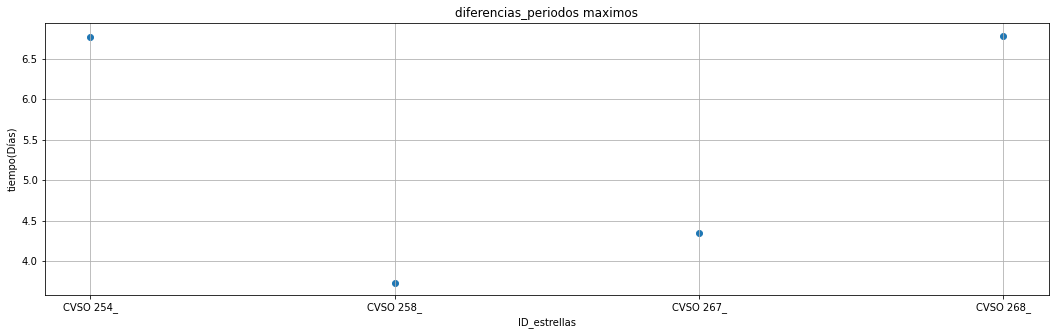

[array([6.76830924]),
 array([3.73662215]),
 array([4.35239606]),
 array([6.78494103])]

In [107]:

lista_resta=[]
resta=0
for variable in diccionario_periodos_maximos:
    
    resta=np.abs((diccionario_periodos_maximos[variable][0])+(diccionario_periodos_maximos[variable][1]))
    lista_resta.append(resta/2)

    
diccionario_ID={}
for j in range(len(lista_ID)):
    
    diccionario_ID[lista_ID[j][101:]]=lista_resta[j]

diccionario_diferencias_sort_=dict(sorted(diccionario_ID.items(),key=lambda item:item[1]))
    
myList=diccionario_diferencias_sort_.items()
myList=sorted(myList)


x,y=zip(*myList)
fig=plt.figure(figsize=(18,5))
plt.scatter(x, y)
plt.xlabel('ID_estrellas')
plt.ylabel('tiempo(Días)')
plt.title('diferencias_periodos maximos')

plt.grid()
plt.show()  


lista_resta

## Trabajo 20 abril 2023


In [108]:
# Realizaremos un mega diccionario uniendo los datos de 30 de 10 para generar un solo LombScargle

mega_diccionario_temporal={}
mega_diccionario_magnitud={}
for i in range(len(lista_ID)):
    
    concat_magnitudes=np.concatenate((diccionario_magnitud[lista_ID[i]][0],diccionario_magnitud[lista_ID[i]][1]))
    concat_temporal=np.concatenate((diccionario_temporal[lista_ID[i]][0],diccionario_temporal[lista_ID[i]][1]))
    
    mega_diccionario_magnitud[lista_ID[i]]=concat_magnitudes
    mega_diccionario_temporal[lista_ID[i]]=concat_temporal
    

In [109]:
# Ahora hallaremos los LombScargle con los mega diccionarios

mega_diccionario_periodo={}
mega_diccionario_poder={}

for i in range(len(lista_ID)):
    
    frecuency_10_30, power_10_30=LombScargle(mega_diccionario_temporal[lista_ID[i]],mega_diccionario_magnitud[lista_ID[i]]).autopower()

    mega_diccionario_poder[lista_ID[i]]=power_10_30
    mega_diccionario_periodo[lista_ID[i]]=1/frecuency_10_30



In [110]:

# Ahora hacemos los periodogramas usando los megas diccionarios



diccionario_mega_periodos_maximos={}
indice_megaperiodo=0
poder_megamax=0

for i in range(len(lista_ID)):
    
    poder_megamax=np.max(mega_diccionario_poder[lista_ID[i][:5000]])
    indice_megaperiodo=np.where(mega_diccionario_poder[lista_ID[i][:5000]]==poder_megamax)
    periodo_maximo=mega_diccionario_periodo[lista_ID[i]][indice_megaperiodo]
    diccionario_mega_periodos_maximos[lista_ID[i]]=[periodo_maximo]
    


        


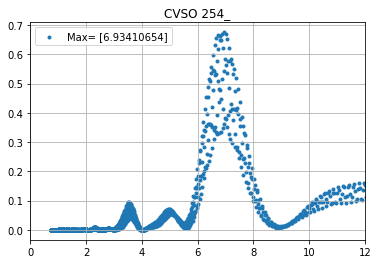

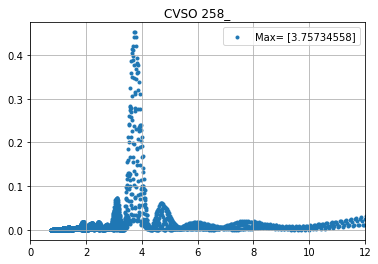

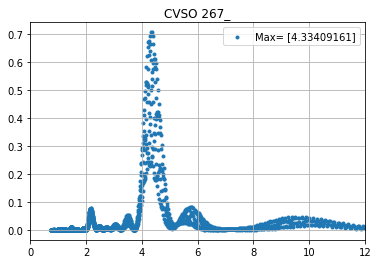

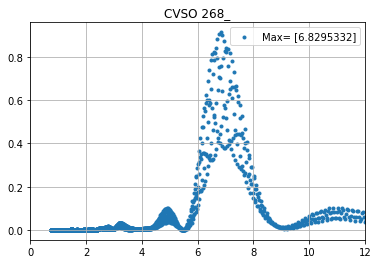

In [111]:
for j in range(len(lista_ID)):
    
    plt.figure()
    plt.scatter(mega_diccionario_periodo[lista_ID[j]][:5000],mega_diccionario_poder[lista_ID[j]][:5000],marker=".",label="Max= "+str(diccionario_mega_periodos_maximos[lista_ID[j]][0]))
    plt.xlim(0,12)
    plt.grid()
    plt.legend()
    
    
    for i in range(len(lista_ID[j][:])):
        
        if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
            plt.title(lista_ID[j][i:])
    

In [112]:
# Ahora vamos a generar una grilla de frecuencias

giga_diccionario_periodo={}
giga_diccionario_poder={}

for k in range(len(lista_ID)):
    
    freq=np.linspace((1/12.5),(1/0.5),5000)
    giga_power=LombScargle(mega_diccionario_temporal[lista_ID[k]][:5000],mega_diccionario_magnitud[lista_ID[k]][:5000]).power(freq)
    
    
    giga_diccionario_periodo[lista_ID[k]]=1/freq
    giga_diccionario_poder[lista_ID[k]]=giga_power
    

In [113]:
#ahora necesitamos generar los periodos maximmos utilizando los diccionarios giga


diccionario_giga_periodos_maximos={}
indice_gigaperiodo=0
poder_gigamax=0

for i in range(len(lista_ID)):
    
    poder_gigamax=np.max(giga_diccionario_poder[lista_ID[i][:5000]])
    indice_gigaperiodo=np.where(giga_diccionario_poder[lista_ID[i][:5000]]==poder_gigamax)
    periodo_maximo=giga_diccionario_periodo[lista_ID[i]][indice_gigaperiodo]
    diccionario_giga_periodos_maximos[lista_ID[i]]=[periodo_maximo]

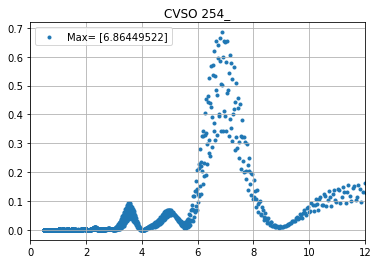

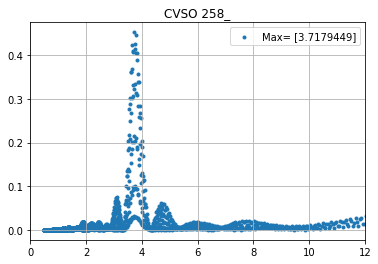

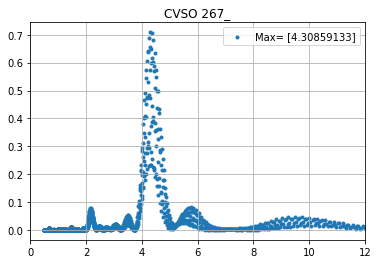

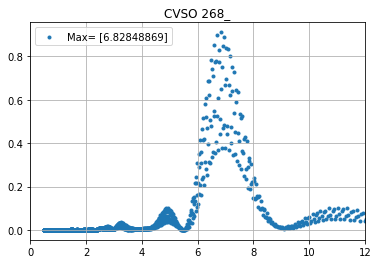

In [114]:
for j in range(len(lista_ID)):
    
    plt.figure()
    plt.scatter(giga_diccionario_periodo[lista_ID[j]][:5000],giga_diccionario_poder[lista_ID[j]][:5000],marker=".",label="Max= "+str(diccionario_giga_periodos_maximos[lista_ID[j]][0]))
    plt.xlim(0,12)
    plt.grid()
    plt.title(lista_ID[j])
    plt.legend()
    
    for i in range(len(lista_ID[j][:])):
        
        if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
            plt.title(lista_ID[j][i:])

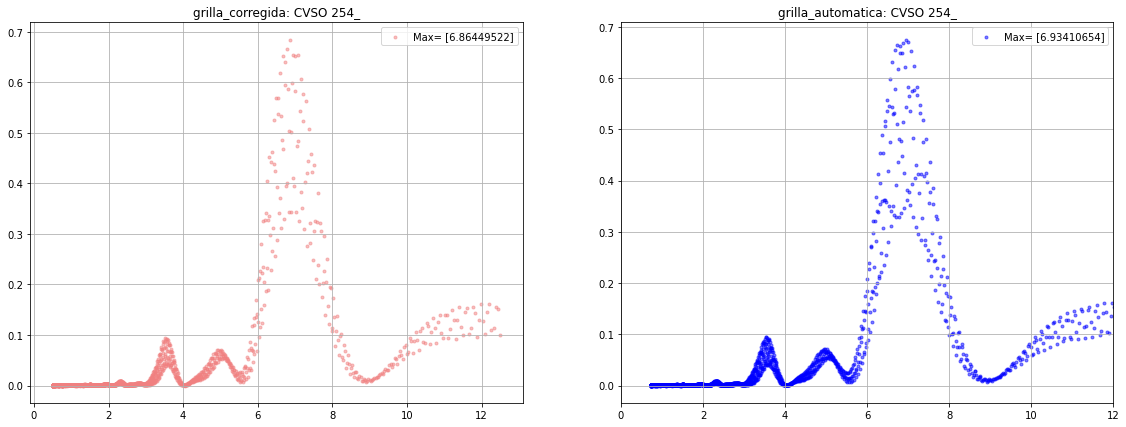

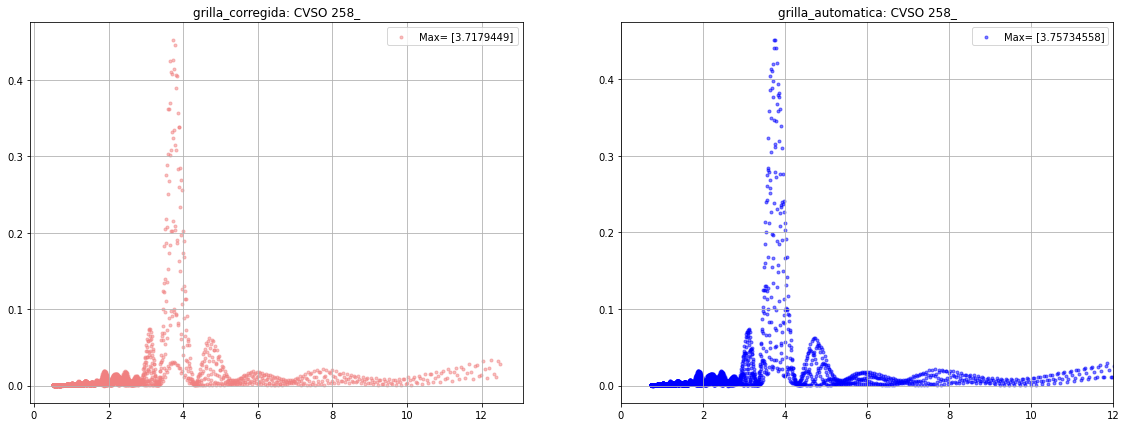

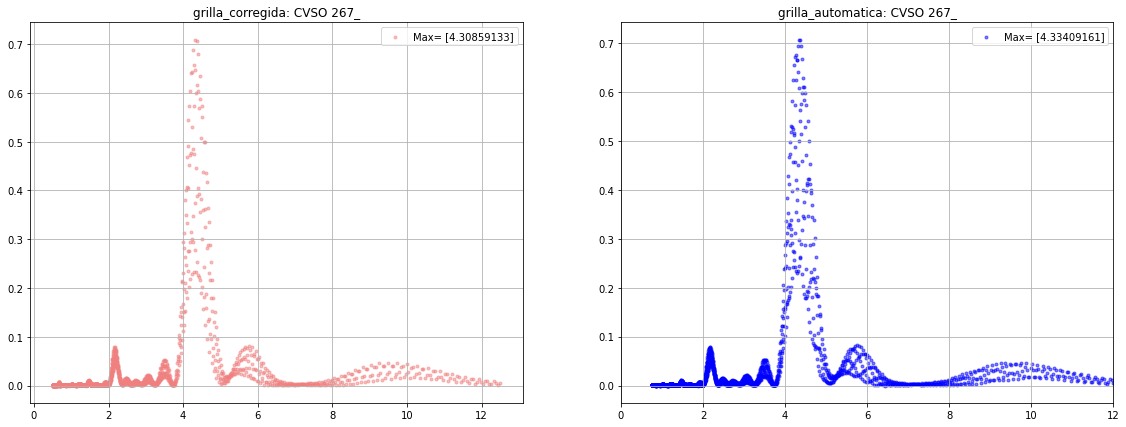

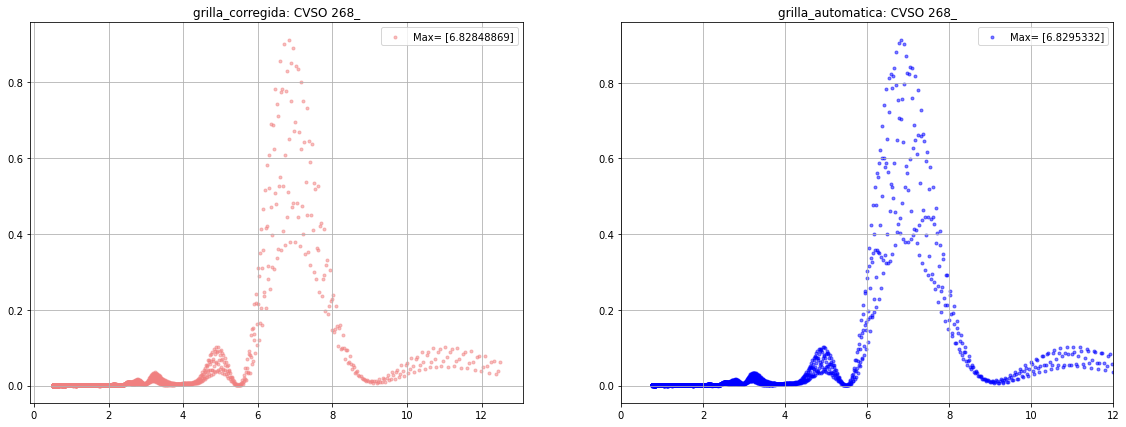

In [115]:
#juntemos las comparaciones

for j in range(len(lista_ID)):
    fig=plt.figure(figsize=(30,7))
    
    
    plt.tight_layout()
    
    for i in range(2):
        
        ax=plt.subplot(1,3,i+1)
        
        if i==0:
            
            plt.scatter(giga_diccionario_periodo[lista_ID[j]][:5000],giga_diccionario_poder[lista_ID[j]][:5000],marker=".",alpha=0.5,color='lightcoral',label="Max= "+str(diccionario_giga_periodos_maximos[lista_ID[j]][0]))
            plt.grid()
            plt.legend()
            
            for i in range(len(lista_ID[j][:])):
        
                if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
    
                    plt.title("grilla_corregida: "+lista_ID[j][i:])
        if i==1:
            
            plt.scatter(mega_diccionario_periodo[lista_ID[j]][:5000],mega_diccionario_poder[lista_ID[j]][:5000],marker=".",color='blue',alpha=0.5,label="Max= "+str(diccionario_mega_periodos_maximos[lista_ID[j]][0]))
            plt.grid()
            plt.legend()
            plt.xlim(0,12)
            
            for i in range(len(lista_ID[j][:])):
        
                if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
    
                    plt.title("grilla_automatica: "+lista_ID[j][i:])
    
    
            
            
    

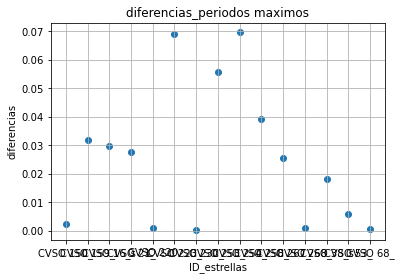

In [93]:
# Diferencias entre periodos maximos
#En esta grafica colocaremos las diferencias entre los periodos maximos medidos utilizando lombscargle utilizando 
#la grilla y sin utilizar esta ultima.


diccionario_diferencias={}
diferencia_max=0
lista_ID_simp=[]
lista_diferencias=[]
    

for i in range(len(lista_ID)):
    
    
    diferencia_max=np.abs(diccionario_giga_periodos_maximos[lista_ID[i]][0]-diccionario_mega_periodos_maximos[lista_ID[i]][0])
    lista_diferencias.append(diferencia_max)
    for j in range(len(lista_ID[i][:])):
        
        if lista_ID[i][j]=="C" and lista_ID[i][j+1]=="V":
            diccionario_diferencias[lista_ID[i][j:]]=diferencia_max
            lista_ID_simp.append(lista_ID[i][j:])
            
            
#Esta parte organiza mi diccionario de modo que las claves van de orden ascendente
diccionario_diferencias_sort=dict(sorted(diccionario_diferencias.items(),key=lambda item:item[1]))
    

    
myList=diccionario_diferencias.items()
myList=sorted(myList)

x,y=zip(*myList)
    
plt.scatter(x, y)
plt.xlabel('ID_estrellas')
plt.ylabel('diferencias')
plt.title('diferencias_periodos maximos')

plt.grid()
plt.show()  




## Trabajo 30 abril 2023 Transformada de Fourier

In [94]:
# Ahora utilizaremos una transformada rapida de fourier para mirar si con otro medoto encontramos
# una diferencia representativa entre los datos tomados en las dos cadencias de diferencia

!pip install scipy
from scipy.fftpack import fft, fftfreq

In [95]:
#Para una sala estrella

magnitudes_10,magnitudes_30=diccionario_magnitud[lista_ID[0]][0],diccionario_magnitud[lista_ID[0]][1]

array_Y_10=np.array(magnitudes_10)
array_Y_30=np.array(magnitudes_30)

Y_10=fft(array_Y_10)/len(array_Y_10) # Aca estamos utilizando la funcion fft para hallar lass trasnformadass
Y_30=fft(array_Y_30)/len(array_Y_30) #de fourier y ademas estamos normalizando estas listas
#definimos el intervalo de tiempo para cada cadencia
dt_10=0.0069446 #cadencia 10 minutos
dt_30=0.0208334  #cadencia 30 minutos



Y_10freq=fftfreq(len(magnitudes_10),dt_10)[:len(array_Y_10)//2]
Y_30freq=fftfreq(len(magnitudes_30),dt_30)



Y_10perio=[]

for i in range(1,len(Y_10freq)):
    
    variable_per=1/Y_10freq[i]
    Y_10perio.append(variable_per)


maximo_Y10_=np.max(np.abs(Y_10[1:len(Y_10)//2]))
indice_max_Y_10=np.where(np.abs(Y_10[1:len(Y_10)//2])==maximo_Y10_)
periodo_max_Y_10=Y_10perio[indice_max_Y_10[0][0]]


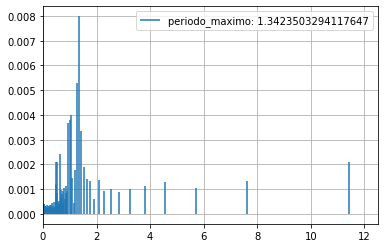

In [96]:
plt.vlines(Y_10perio, 0,np.abs(Y_10[1:len(Y_10)//2]),label="periodo_maximo: "+str(periodo_max_Y_10)) 
plt.grid()
plt.xlim(0,12.5)
plt.legend()

### La tansformada rapida de Fourier no nos sirve debido a que solo utiliza periodos que son un multiplo del periodo maximo. O en otras palabras, utiliza periodos que forman una onda estacionaria.


In [97]:
# Ahora realizamos un ajuste gaussiano a los periodogramas para ver los anchos de banda. Para ello utilizamos un ajuste 
# gaussiano a los picos principales de cada una de los periodogramas


# Lo primero que haremos será encontran un aproximado de la longitud de la base de cada periodograma y esto lo hare con los 
# periodogramas para cada cadencia asi como con los periodogramas que juntan ambas cadencias en un solo diccionario.


# ANCHO DE BANDA PARA LOS PERIODOGRAMAS INDIVIDUALES CON CADENCIA DE 10 Y 30 MINUTOS
variable_10=[]
variable_30=[]

lista_variable_10=[]

contador_poder10=0
contador_30=0

indice_max10=0
indice_max30=0


lista_indices_gaussiana=[]


for i in range(len(diccionario_periodos_maximos)):
    
    indice_max10=diccionario_indices_maximos[lista_ID[i]][0][0][0]
    indice_max30=diccionario_indices_maximos[lista_ID[i]][1][0][0]
    
    contador_poder10=diccionario_poder[lista_ID[i]][0][indice_max10]
    contador_poder30=diccionario_poder[lista_ID[i]][1][indice_max30]
    k=1
    
  
    while contador_poder10 > diccionario_poder[lista_ID[i]][0][diccionario_indices_maximos[lista_ID[i]][0][0][0]+k] and contador_poder10 > diccionario_poder[lista_ID[i]][0][diccionario_indices_maximos[lista_ID[i]][0][0][0]-k]:
        contador_poder10=diccionario_poder[lista_ID[i]][0][diccionario_indices_maximos[lista_ID[i]][0][0][0]+k]
        k+=1
        
    variable_10.append([diccionario_indices_maximos[lista_ID[i]][0][0][0]+k-3,k-3]) 

    k=1
    
    while contador_poder30 > diccionario_poder[lista_ID[i]][1][diccionario_indices_maximos[lista_ID[i]][1][0][0]+k] and contador_poder30 > diccionario_poder[lista_ID[i]][1][diccionario_indices_maximos[lista_ID[i]][1][0][0]-k]:
        contador_poder30=diccionario_poder[lista_ID[i]][1][diccionario_indices_maximos[lista_ID[i]][1][0][0]+k]
        k+=1
        
    variable_30.append([diccionario_indices_maximos[lista_ID[i]][1][0][0]+k,k])

for va in range(len(variable_10)):
    
    indice_max10=diccionario_indices_maximos[lista_ID[va]][0][0][0]
    indice_max30=diccionario_indices_maximos[lista_ID[va]][1][0][0]
    
    variable_10[va][1]=indice_max10 - variable_10[va][1]
    variable_30[va][1]=indice_max30 - variable_30[va][1]
    

In [74]:
# Ahora crearemos una funcion ventana.
# Esto lo que hara es que en todos los puntos fuera del pico principal, el periodograma valga cero

diccionario_funciones_ventana={}
def funcion_ventana(dic,var10,var30):
    
    for sa in range(len(lista_ID)):
        
        fun=np.zeros(len(diccionario_poder[lista_ID[sa]][0]))
        fun_30=np.zeros(len(diccionario_poder[lista_ID[sa]][1]))
        
        for ka in range(len(diccionario_poder[lista_ID[sa]][0])):
            
            if ka>=var10[sa][1] and ka <= var10[sa][0]:
                fun[ka]=1
        
        
        for ma in range(len(diccionario_poder[lista_ID[sa]][1])):
            
            if ma>=var30[sa][1] and ma <= var30[sa][0]:
                fun_30[ma]=1
        
        diccionario_funciones_ventana[lista_ID[sa]]=[fun,fun_30]
        
    return diccionario_funciones_ventana
    


In [75]:
# Crearemos tres graficas. La primera contendra el periodograma con cadencia individual, despues dibujaremos la funcion ventana
# y por ultimo haremos una multiplicacion entre las dos graficas con el objetivo de solo obtener el pico principal de 
# cada periodograma

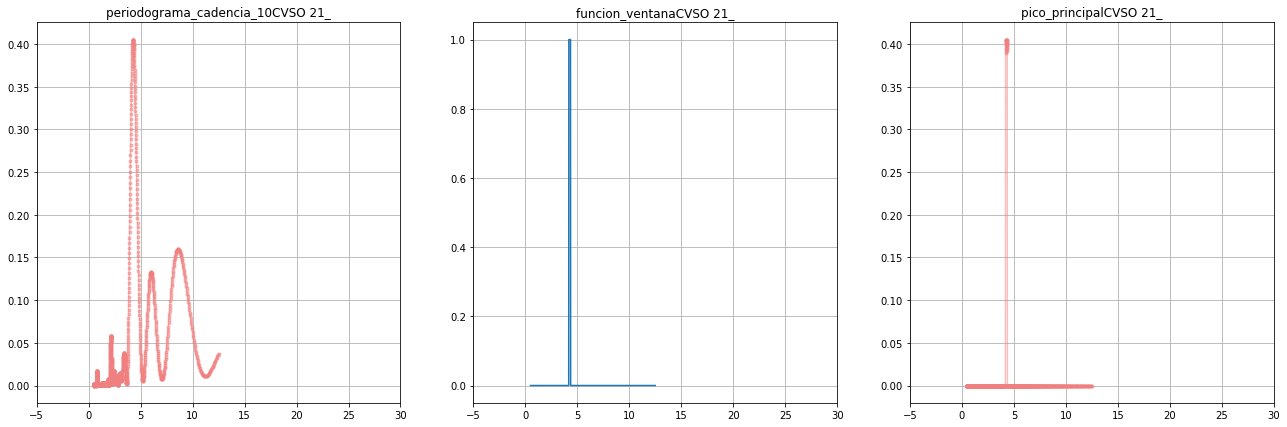

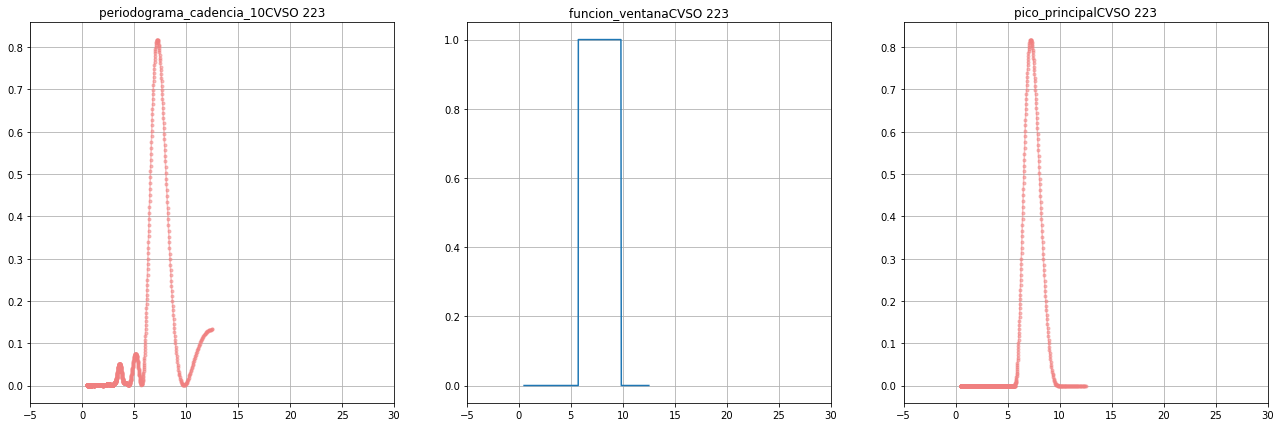

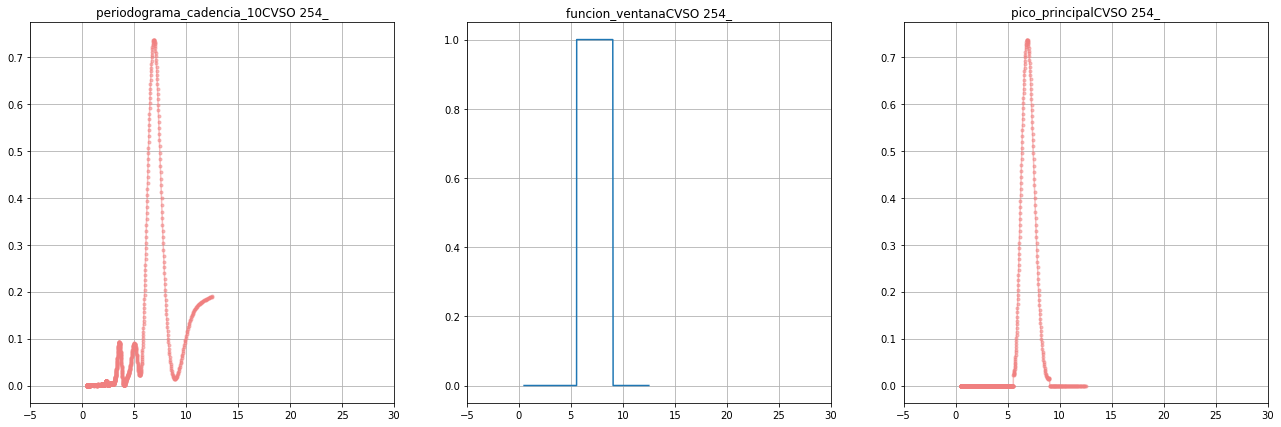

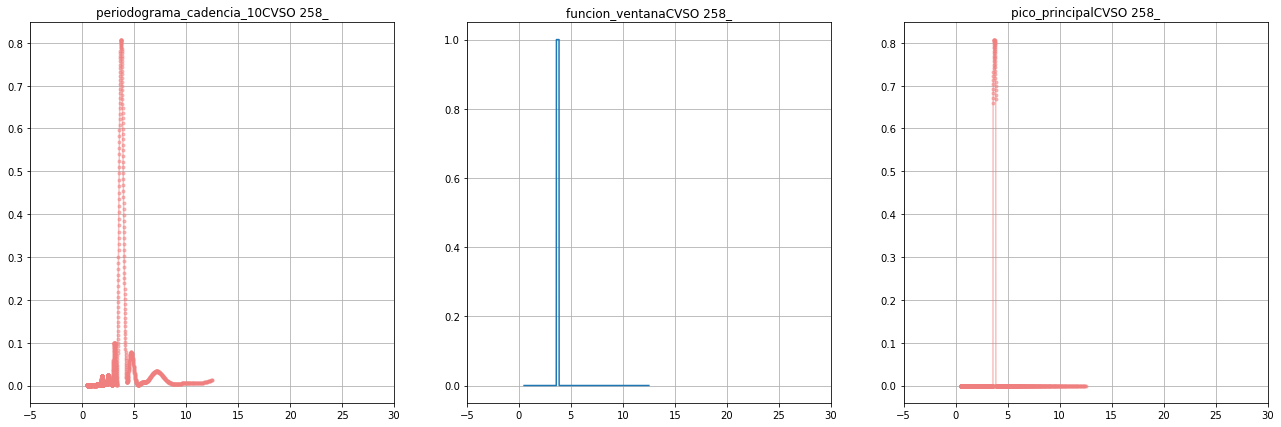

In [76]:


diccionario_poder_10_pico={}
for j in range(len(lista_ID)):
    
    fig=plt.figure(figsize=(30,7))
    plt.tight_layout()
    
    for i in range(3):
        
        ax=plt.subplot(1,4,i+1)
        
        if i==0:
            
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000],marker=".",label="10min",alpha=0.5,color='lightcoral')
            ax.set_xlim(-5,30)
            ax.grid()
            
            for i in range(len(lista_ID[j][:])):
        
                if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
    
                    plt.title("periodograma_cadencia_10"+lista_ID[j][i:])
 
            
        if i==1:
            
        
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],funcion_ventana(diccionario_poder,variable_10,variable_30)[lista_ID[j]][0][:5000])
            ax.set_xlim(-5,30)
            ax.grid()
            
            for i in range(len(lista_ID[j][:])):
        
                if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
    
                    plt.title("funcion_ventana"+lista_ID[j][i:])
 
                    
        if i==2:
            
            diccionario_poder_10_pico[lista_ID[j]]=diccionario_poder[lista_ID[j]][0][:5000]*funcion_ventana(diccionario_poder,variable_10,variable_30)[lista_ID[j]][0][:5000]
            
            ax.plot(diccionario_periodo[lista_ID[j]][0][:5000],diccionario_poder[lista_ID[j]][0][:5000]*funcion_ventana(diccionario_poder,variable_10,variable_30)[lista_ID[j]][0][:5000],marker=".",label="10min",alpha=0.5,color='lightcoral')
            ax.set_xlim(-5,30)
            ax.grid()
            
            
            for i in range(len(lista_ID[j][:])):
        
                if lista_ID[j][i]=="C" and lista_ID[j][i+1]=="V":
    
                    plt.title("pico_principal"+lista_ID[j][i:])
 
             
 
 